# Homework 3 - Classification

In this homework, we will use the Car price dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Features**

For the rest of the homework, you'll need to use only these columns:

Make,

Model,

Year,

Engine HP,

Engine Cylinders,

Transmission Type,

Vehicle Style,

highway MPG,

city mpg,

MSRP

In [2]:
df = pd.read_csv('Car_price_dataset.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
#Original columns names
categories = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style',
              'highway MPG','city mpg','MSRP']
df = df[categories]
print(df.columns)
print(df.shape)

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')
(11914, 10)


In [4]:
#Missing values
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

**Data preparation**

Select only the features from above and transform their names using the next line:

data.columns = data.columns.str.replace(' ', '_').str.lower

Fill in the missing values of the selected features with 0.

Rename MSRP variable to price.

In [5]:
#Column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')


In [6]:
#Missing values
df = df.fillna(0)
print(df.isnull().sum())

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64


In [7]:
# Changing msrp to price
df.columns = df.columns.str.replace('msrp','price')
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


**Question 1**

What is the most frequent observation (mode) for the column transmission_type?

AUTOMATIC

MANUAL

AUTOMATED_MANUAL

DIRECT_DRIVE

In [8]:
df['transmission_type'].mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

**Question 2**

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

engine_hp and year

engine_hp and engine_cylinders

highway_mpg and engine_cylinders

highway_mpg and city_mpg

<AxesSubplot:>

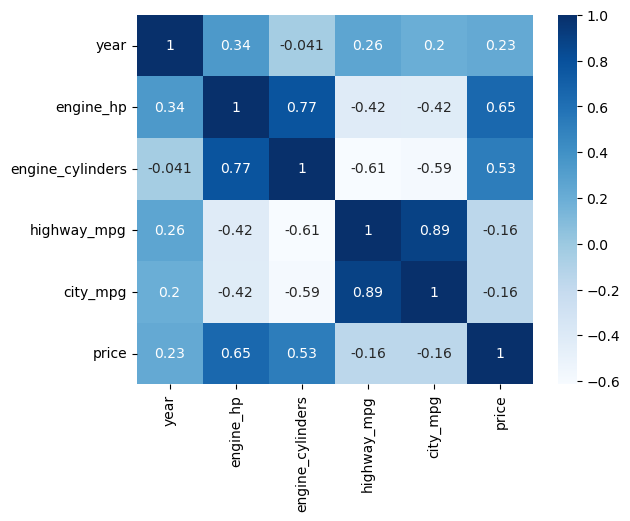

In [9]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot = True, cmap="Blues")

**Make price binary**

Now we need to turn the price variable from numeric into a binary format.

Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [10]:
price_mean = df.price.mean()
price_mean

40594.737032063116

In [11]:
df['above_average'] = (df.price > price_mean).astype(int)
df['above_average']

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int32

**Split the data**

Split your data in train/val/test sets with 60%/20%/20% distribution.

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

Make sure that the target value (above_average) is not in your dataframe.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [14]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [17]:
del df_train['price']
del df_val['price']
del df_test['price']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

**Question 3**

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.

Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?

make

model

transmission_type

vehicle_style

In [18]:
from sklearn.metrics import mutual_info_score

In [19]:
def mutual_info_above_average_score(series):
    return round(mutual_info_score(series, df_full_train.above_average),2)

In [20]:
categorical = df.select_dtypes(include=['object']).columns
mutual_info = df_full_train[categorical].apply(mutual_info_above_average_score)
mutual_info.sort_values()

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

**Question 4**

Now let's train a logistic regression.

Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

0.60

0.72

0.84

0.95

In [21]:
from sklearn.feature_extraction import DictVectorizer

In [22]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression(solver='liblinear', C=10, max_iter = 1000, random_state = 42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [25]:
y_pred = model.predict_proba(X_val)[:, 1]

In [26]:
y_pred = (y_pred >= 0.5)

In [27]:
acc = (y_val == y_pred).mean()
print(round(acc,2))

0.95


**Question 5**

Let's find the least useful feature using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

year

engine_hp

transmission_type

city_mpg

In [28]:
#categories = df_train.columns
categories = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']
model = LogisticRegression(solver='liblinear', C=10, max_iter = 1000, random_state = 42)

In [29]:
for feat in categories:
    new_x_train = df_train.drop(feat, axis=1)
    new_train_dict = new_x_train.to_dict(orient='records')
    new_X_train = dv.fit_transform(new_train_dict)
    new_x_val = df_val.drop(feat, axis=1)
    new_val_dict = new_x_val.to_dict(orient='records')
    new_X_val = dv.transform(new_val_dict)
    model.fit(new_X_train, y_train)
    y_pred = model.predict_proba(new_X_val)[:, 1]
    predicts = (y_pred >= 0.5)
    new_acc = (y_val == predicts).mean()
    print(f"Model without {feat} has diff of = {acc - new_acc}")

Model without make has diff of = -0.002937473772555599
Model without model has diff of = 0.022240872849349502
Model without year has diff of = -0.0016785564414604215
Model without engine_hp has diff of = 0.015946286193873282
Model without engine_cylinders has diff of = -0.0008392782207301552
Model without transmission_type has diff of = 0.0012589173310951773
Model without vehicle_style has diff of = 0.003776751993285754
Model without highway_mpg has diff of = 0.0020981955518254436
Model without city_mpg has diff of = 0.0004196391103650221


**Question 6**

For this question, we'll see how to use a linear regression model from Scikit-Learn.

We'll need to use the original column price. Apply the logarithmic transformation to this column.

Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.

This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].

Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

0

0.01

0.1

1

10

In [30]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [31]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [32]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = df_train.price.values
y_val = df_val.price.values

In [33]:
del df_train['price']
del df_val['price']
del df_train['above_average']
del df_val['above_average']

In [34]:
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [35]:
from sklearn.linear_model import Ridge

In [36]:
for i in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=i, solver='sag', random_state=42)
    model.fit(X_train, np.log1p(y_train))
    y_pred = model.predict(X_val)
    print(f"Alpha = {i}, RMSE = {round(rmse(np.log1p(y_val), y_pred),3)}")

Alpha = 0, RMSE = 0.494
Alpha = 0.01, RMSE = 0.494
Alpha = 0.1, RMSE = 0.494
Alpha = 1, RMSE = 0.494
Alpha = 10, RMSE = 0.494
